In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from properties import CSV_FOLDER, POSTGRES_CREDENTIALS

In [2]:
FOLD = CSV_FOLDER / "count-by-age"
df_original = pd.read_csv(FOLD / "listening_events-count-by-age-raw.txt", delimiter='\t' )
df_track = pd.read_csv(FOLD / "listening_events-count-by-age_valid_tracks.txt", delimiter='\t')

In [3]:
print(df_original['amt_le'].sum())
df_track['amt_le'].sum()

1131465529


np.int64(2027148)

In [4]:
df = pd.DataFrame(data={"age_at_listen": df_original['age_at_listen'], 
                        "original": df_original['amt_le']/df_original['amt_le'].sum()*100, 
                        "track": df_track['amt_le']/df_track['amt_le'].sum()*100
                        }
                )


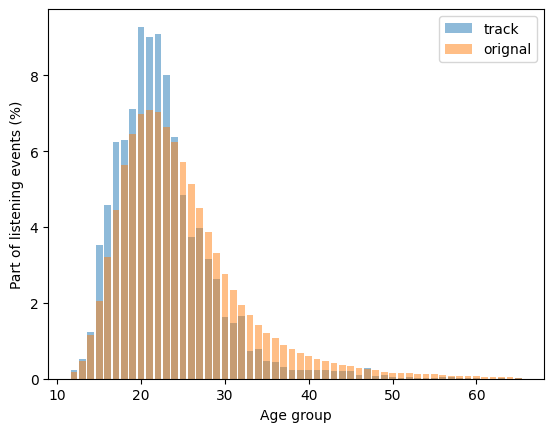

In [5]:
import numpy as np
assert np.isclose(df.original.sum(),100), f"{df.original.sum()}"
assert np.isclose(df.track.sum(), 100), f"{df.track.sum()}"

plt.bar(x=df.age_at_listen, height=df.track, alpha=0.5, label='track')
plt.bar(x=df.age_at_listen, height=df.original, alpha=0.5, label='orignal')
plt.legend()
plt.ylabel("Part of listening events (%)")
plt.xlabel("Age group")
plt.show()

<Axes: xlabel='conf_artist', ylabel='conf_track'>

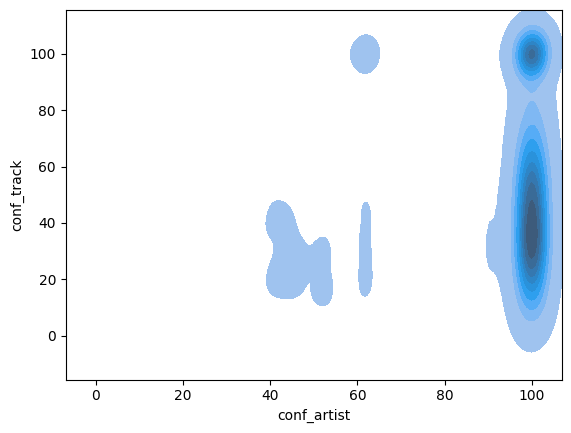

In [18]:
from utils import create_connection

conn, cursor = create_connection("genius_db")
cursor.execute("select * from lfm2b_genius")
res = cursor.fetchall()
conn.close()

data = pd.DataFrame(res, columns=["track_id", "song_id", "conf_artist", "conf_track"])
sns.kdeplot(data, x="conf_artist", y="conf_track", fill=True)